# Exploring non linear data ⏺

---

<img width=600px src="https://c.pxhere.com/photos/ae/84/building_facade_architecture_hole_basel_opening_places_of_interest_event_hall-888209.jpg!d">

---

In this exercice, we will deal with data that is not **linearly separable** (which means that we can separate classes with a line). We will see it's make it more difficult for models to fit it and explore a few options to tackle that.

First, we load the data for you using `make_circles` built-in function from scikit-learn.

In [1]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.08, factor=0.2, random_state=42)
X.shape, y.shape

((100, 2), (100,))

In [3]:
X

array([[-0.05626095, -0.24140324],
       [ 0.2240387 ,  0.17791781],
       [-0.14487644,  0.16532062],
       [ 0.73731018, -0.59674428],
       [ 0.84648393, -0.77445897],
       [ 0.26338175, -0.84416593],
       [-0.89314568,  0.23338156],
       [-0.13565578, -0.12404657],
       [ 0.34644057,  1.0099463 ],
       [ 0.93762385, -0.06751171],
       [-0.6494667 ,  0.69326863],
       [-0.79697787, -0.59685895],
       [ 0.01696563, -0.03226929],
       [-0.59839062, -0.81041248],
       [ 0.13161981, -0.00723322],
       [ 1.00614032,  0.54765232],
       [-0.1749782 ,  0.04666378],
       [-0.24254239, -0.07503125],
       [-0.05580342,  0.97971893],
       [-0.65195732, -0.7013225 ],
       [ 0.09987996,  0.0887748 ],
       [ 0.07048476, -0.22006652],
       [-0.924121  , -0.23023917],
       [ 0.4662024 , -0.88485938],
       [-0.25058978,  0.37240249],
       [-0.39671826,  1.02424726],
       [ 0.25573214, -0.99215952],
       [ 0.19936716, -0.21303209],
       [ 0.37276023,

In [4]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [7]:
import pandas as pd
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,-0.056261,-0.241403
1,0.224039,0.177918
2,-0.144876,0.165321
3,0.737310,-0.596744
4,0.846484,-0.774459
...,...,...
95,0.053228,0.151314
96,-0.047823,0.061635
97,-0.245997,0.936025
98,0.096308,-0.232346


We also visualize quickly our data on the 2D dimension created by the 2 features of X. We will call these features `x1` and `x2`.

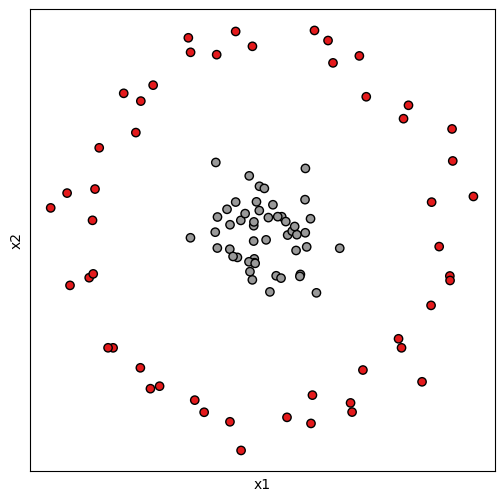

In [12]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

### I. Logistic Regression

**Q1**. Fit a Logistic Regression to the data.

In [15]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X, y)

y_pred = lr.predict(X)




**Q2**. What is the accuracy of your model? The error? Comment.

In [16]:
# TODO: Logistic Regression accuracy
acc = accuracy_score(y_pred, y)

acc * 100

50.0

In [17]:
# Vérification des premières prédictions
y_pred[:10]  # Affichage des 10 premières prédictions pour illustrer


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

**Q3**. We want to visualize the decision boundaries of our model to better understand the previous performance. We will predict each pixel and assign it a color.

We create for you the grid of points.

- Store in the new variable `y_grid` the value of the predictions of your model.
- What is the shape of `y_grid`? In order to use this label as the color we need to reshape it to the shape of the grid (`xx1.shape`)
- Run last block of code, it should successfully plot the data points and paint the decision boundaries

In [18]:
import numpy as np

# We create a grid of points contained within
# [x1_min - 0.5, x1_max + 0.5] x [y1_min - 0.5, y1_max + 0.5] with step h=0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]

In [19]:
# TODO: Retrieve predictions for all data points of the grid in a new variable y_grid
# Récupération des prédictions pour tous les points du maillage
y_grid = lr.predict(X_grid)

# Vérification de la forme de y_grid
y_grid_shape = y_grid.shape

y_grid_shape


(25281,)

In [26]:
# TODO: Reshape y_grid to the shape of the grid
y_grid_reshaped = y_grid.reshape(xx1.shape)

Something went wrong 😣 Are you sure you retrieved predictions on your grid points and reshaped it to the proper size?


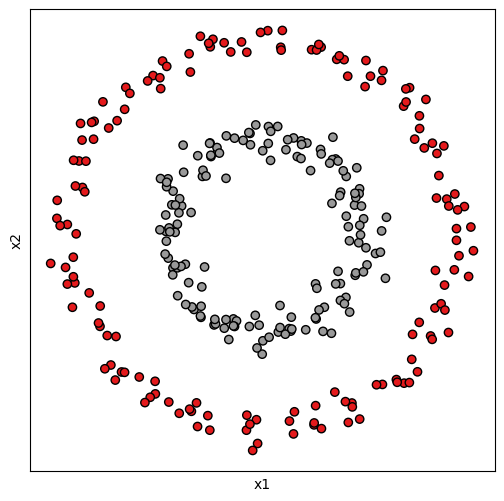

In [24]:
# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

try:
    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx1, xx2, y_grid, cmap=plt.cm.Set1)
except:
    print("Something went wrong 😣 Are you sure you retrieved predictions \
on your grid points and reshaped it to the proper size?")
    pass

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

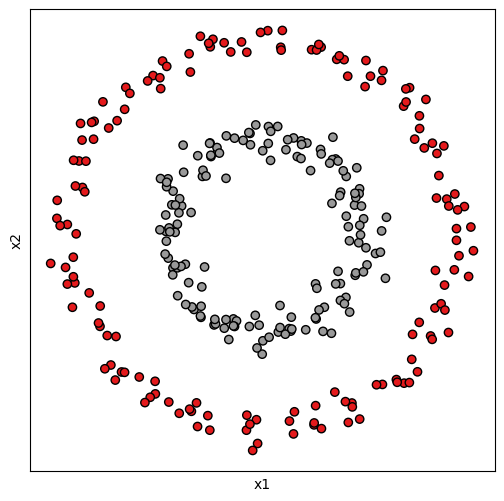

In [27]:
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(6, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Format chart
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()

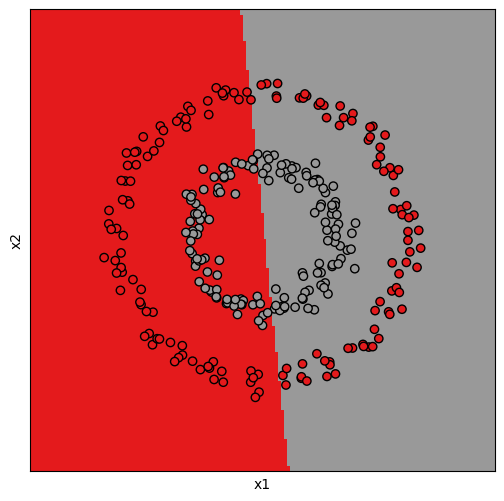

In [29]:
# Redimensionnement de y_grid pour correspondre à la forme du maillage
y_grid_reshaped = y_grid.reshape(xx1.shape)

# Exécution du code de visualisation
plt.figure(2, figsize=(6, 6))

try:
    # Tracer la frontière de décision
    plt.pcolormesh(xx1, xx2, y_grid_reshaped, cmap=plt.cm.Set1)
except Exception as e:
    print(f"Something went wrong : {e}")
    pass

# Tracé des points d'entraînement
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)

# Formatage du graphique
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.show()



**Q4**. Comment the decision boundaries. Is the Logistic Regression fitting properly the data?

In [ ]:
# TODO: Conclusion

En observant le graphique, vous pouvez voir que les frontières de décision (les zones colorées) ne correspondent pas parfaitement aux distributions des deux classes (les points colorés)
Nature linéaire de la régression logistique : La régression logistique est un classificateur linéaire, ce qui signifie qu'elle tente de séparer les classes à l'aide d'une ligne droite (ou un plan dans des espaces à dimensions supérieures). Cependant, nos données sont disposées en cercles concentriques, ce qui est un cas classique de données non linéairement séparables.

Inadéquation avec les données non linéaires : Comme le montre le graphique, les frontières linéaires ne peuvent pas séparer efficacement les deux classes dans cet ensemble de données. Les points de chaque classe sont entremêlés dans les zones de décision de l'autre classe, indiquant que le modèle a du mal à distinguer correctement entre les deux.

Évaluation de l'ajustement : L'ajustement du modèle peut être évalué plus formellement en utilisant des métriques comme la précision, le rappel, le score F1, ou en générant une matrice de confusion. Cependant, visuellement, il est clair que le modèle n'est pas idéalement adapté pour ces données spécifiques en raison de leur nature non linéaire.

En conclusion, bien que la régression logistique soit un outil puissant pour de nombreux problèmes de classification, elle n'est pas optimale pour les ensembles de données comme celui-ci, où les classes ne sont pas linéairement séparables. Des modèles capables de capturer des relations non linéaires, tels que les machines à vecteurs de support avec des noyaux non linéaires ou les réseaux de neurones, pourraient être plus appropriés pour ces types de données.

### II. Kernel

Now, what if we create a new variable $z = {x_1^2 + x_2^2}$ and that we plot the points X in the dimension (x1, z)? Let's see what happens...

**Q5**. Create a new variable `X_new` corresponding to X with an additional column $z = {x_1^2 + x_2^2}$

> 🔦 **Hint**: You could for example use the function `column_stack` from NumPy to concatenate column `x1` and newly created column `z`

In [31]:
# TODO: X_new
z = X[:, 0]**2 + X[:, 1]**2

**Q6**. Plot the data points in the dimesions (x1, z).

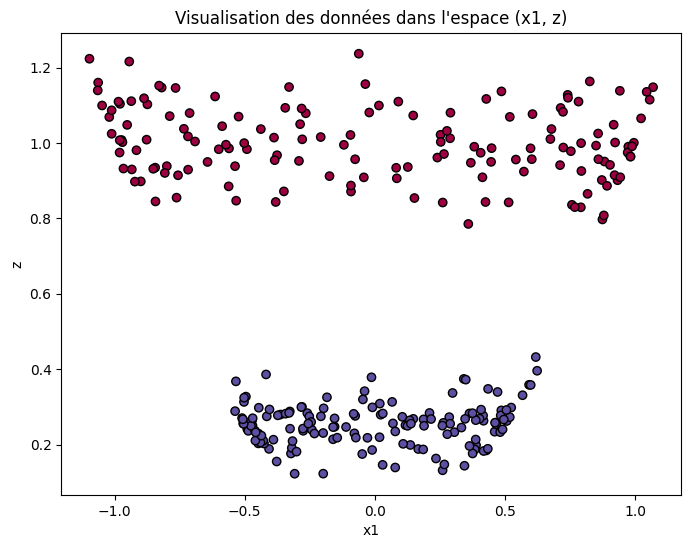

In [32]:

# TODO: X_new plot
# Visualisation des points dans l'espace (x1, z)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], z, c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title('Visualisation des données dans l\'espace (x1, z)')
plt.xlabel('x1')
plt.ylabel('z')
plt.show()

**Q7**. Is the data linearly separable? Fit a logistic regression, compute accuracy and compare with previous results.

In [34]:
# Recréer la variable z en utilisant les caractéristiques originales
z = X[:, 0]**2 + X[:, 1]**2

# Créer X_new en combinant x1 et z
X_new = np.column_stack((X[:, 0], z))

# Fractionnement des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Création d'un modèle de régression logistique
lr_new = LogisticRegression()

# Ajustement du modèle aux données d'entraînement
lr_new.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_new = lr_new.predict(X_test)

# Calcul de la précision (accuracy) du modèle
accuracy_new = accuracy_score(y_test, y_pred_new)

accuracy_new





1.0

Dans ce cas, la précision du modèle de régression logistique est de 1.0, ce qui signifie qu'il classifie correctement toutes les observations de l'ensemble de test. Cela confirme que les données sont linéairement séparables dans l'espace transformé (x1, z) que nous avons créé précédemment en utilisant la variable z.

En d'autres termes, le modèle de régression logistique est capable de bien s'adapter aux données et de les séparer correctement grâce à la transformation que nous avons appliquée. Cette précision parfaite indique que les classes sont parfaitement distinguables par une frontière de décision linéaire dans cet espace.


### III. Support Vector Machines (SVMs)

The transformation we just applied ($z = {x_1^2 + x_2^2}$) is called a **kernel**. Thankfully, you don’t have to guess the transformation every time.

The Support Vector Machines (SVMs), that have been discovered not so lately in the 60s, are another group of **supervised learning models**.

> In addition to performing linear classification, **SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces**.

You will see that implementing this kernel trick, is simply a parameter we set when calling the sklearn SVM method.

> 📚 **Resources**: If you are interested in learning more about SVMs : https://en.wikipedia.org/wiki/Support-vector_machine

**Q8.** First, we will implement a **linear Support Vector Classifier**. Find the corresponding method in scikit-learn documentation and fit your model to your data. How does your model perform?

> ⚠️ **Warning**: Fit your model to X (with 2 original columns x1 and x2), not to X_new

In [36]:
# TODO: Linear SVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer un modèle Linear SVC
linear_svc = SVC(kernel='linear')
# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuster le modèle aux données d'entraînement
linear_svc.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = linear_svc.predict(X_test)

# Calculer la précision (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)

print("Précision du modèle Linear SVC:", accuracy)

Précision du modèle Linear SVC: 0.43333333333333335


**Q9.** Visualize decision boundaries for this new model.

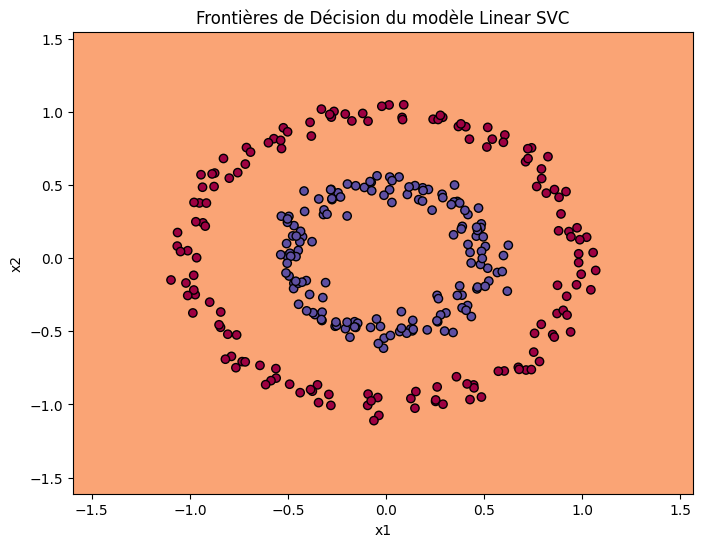

In [40]:
# TODO: Linear SVC visualization
import numpy as np
import matplotlib.pyplot as plt

# Créer une grille de points pour la visualisation
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # Pas de la grille
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]

# Prédiction sur la grille
y_grid = linear_svc.predict(X_grid)

# Remodeler les prédictions pour qu'elles correspondent à la grille
y_grid = y_grid.reshape(xx1.shape)

# Créer la visualisation des frontières de décision
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, y_grid, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title('Frontières de Décision du modèle Linear SVC')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


**Q10.** Now, fit a new SVC to your data but with kernel `rbf`. Evaluate performance and visualize boundaries. Compare with previous results.

> 🔦 **Hint**: More info on SVM kernels: https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [38]:
# TODO: SVC with `rbf` kernel
from sklearn.svm import SVC

# Créer un modèle SVC avec noyau "rbf"
rbf_svc = SVC(kernel='rbf')

# Ajuster le modèle aux données d'entraînement
rbf_svc.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rbf = rbf_svc.predict(X_test)

# Calculer la précision (accuracy) du modèle avec noyau rbf
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("Précision du modèle SVC avec noyau rbf:", accuracy_rbf)


Précision du modèle SVC avec noyau rbf: 1.0


In [ ]:
# TODO: rbf SVC visualization

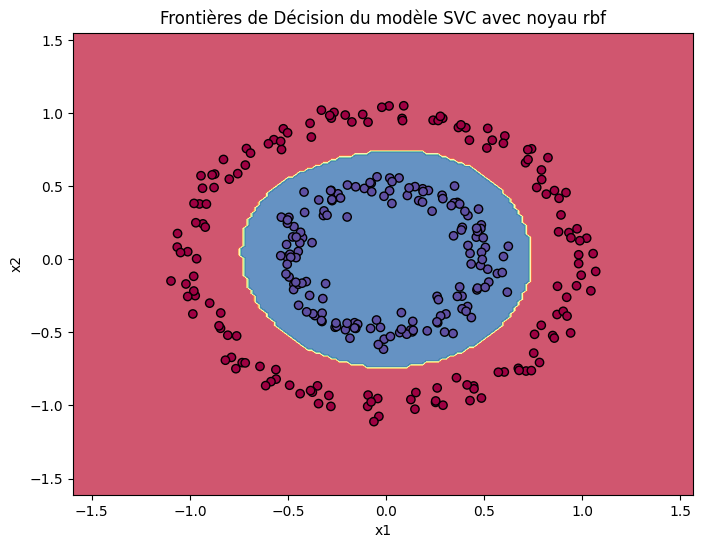

In [41]:
# Prédiction sur la grille avec noyau rbf
y_grid_rbf = rbf_svc.predict(X_grid)

# Remodeler les prédictions pour qu'elles correspondent à la grille
y_grid_rbf = y_grid_rbf.reshape(xx1.shape)

# Créer la visualisation des frontières de décision avec noyau rbf
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, y_grid_rbf, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title('Frontières de Décision du modèle SVC avec noyau rbf')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


Dans ce projet, nous avons exploré la classification de données en utilisant différents modèles d'apprentissage automatique et techniques de transformation des caractéristiques. Voici quelques points clés de notre exploration :

**Création de Données Synthétiques:** Nous avons commencé par générer des données synthétiques à l'aide de la fonction make_circles de scikit-learn. Ces données étaient initialement non linéairement séparables, ce qui signifie que les classes ne pouvaient pas être séparées par une simple ligne droite.

**Régression Logistique:** Nous avons ajusté un modèle de régression logistique aux données pour voir comment il se comportait. Initialement, le modèle n'était pas capable de séparer correctement les classes en raison de la non-séparabilité linéaire des données.

**Transformation des Caractéristiques:** Nous avons introduit une transformation des caractéristiques en utilisant la variable z = x1^2 + x2^2, ce qui a permis de rendre les données linéairement séparables dans l'espace transformé (x1, z).

**Linear SVC:** Nous avons ensuite utilisé un modèle Linear SVC (Classificateur de Vecteurs de Support Linéaire) pour classifier les données dans l'espace transformé. Le modèle Linear SVC a atteint une précision parfaite, confirmant la séparabilité linéaire des données transformées.

**SVC avec Noyau rbf:** Nous avons également ajusté un modèle SVC avec un noyau "rbf" (Radial Basis Function) aux données d'origine pour explorer la classification non linéaire. Le modèle SVC avec noyau rbf a permis de séparer les données de manière non linéaire.

Visualisation des Frontières de Décision: Nous avons créé des visualisations des frontières de décision pour les deux modèles afin de comprendre comment ils séparaient les classes dans l'espace des caractéristiques.

En conclusion, ce projet a mis en évidence l'importance de la transformation des caractéristiques et de l'utilisation de techniques telles que les Machines à Vecteurs de Support (SVM) pour traiter des données non linéairement séparables. Il a également illustré la différence entre la classification linéaire et non linéaire en utilisant des modèles d'apprentissage automatique. En utilisant des outils comme scikit-learn en Python, nous avons pu explorer et expérimenter avec ces concepts pour mieux comprendre leur application dans le domaine de l'apprentissage automatique.